## IMPORTING LIBRARIES

In [3]:
#General Libraries
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns


/home/manikandan/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/manikandan/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Importing datasets

In [4]:
#read a files
Offers_details=pd.read_json(r"Dataset/Offer_details.json",lines=True)
Customers_info=pd.read_json("Dataset/Customer_info.json",orient="records",lines=True)
Transaction_details=pd.read_json("Dataset/Transaction_details.json",orient="records",lines=True)

## EXPLORING DATASETS

In [5]:
Offers_details.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [6]:
Customers_info.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
Transaction_details.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [8]:
Offers_details.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [9]:
Customers_info.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [10]:
Transaction_details.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


## DATA CLEANSING FUNCTIONS

### Offers_Details Dataset
    
  - **Channel**
    - Create a new individual column for variables
  - **Offer_type**
    - Create a columns for offer type


In [11]:
#Number as rows and columns
print(Offers_details.shape)

(10, 6)


In [12]:
#Datatypes of each columns
Offers_details.dtypes

reward         int64
channels      object
difficulty     int64
duration       int64
offer_type    object
id            object
dtype: object

In [13]:
#Show the column names
Offers_details.columns

Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'id'], dtype='object')

In [14]:
#Calculate null values in offers_details dataframe 
Offers_details.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

**There are no null values in this dataframe**

In [15]:
# print info about the data
Offers_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [16]:
#Calculate unique values of column offer_types
Offers_details["offer_type"].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

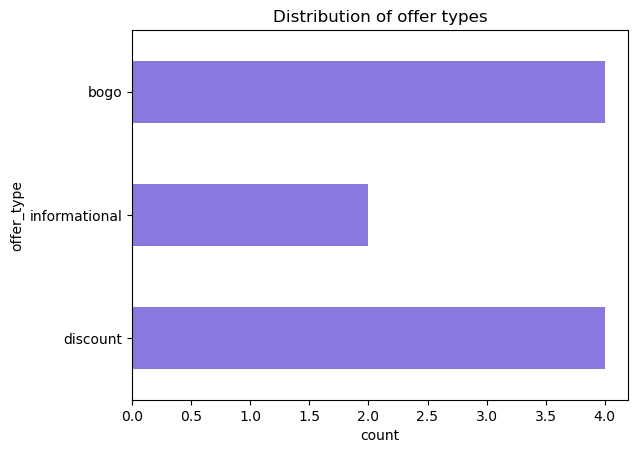

In [17]:
sns.countplot(data=Offers_details,y="offer_type",width=0.5,color="mediumslateblue")
plt.title("Distribution of offer types")

plt.savefig("Offer_details_Offer_type")

**There are 3 offer types in this chart
    - bogo
    - informational
    - Discount
Bogo and Discount offers are most common .
  These types of promotion are more heavily utilized compared to "informational" offers.**

  **- Businesses might focus more on "bogo" and "discount" offers due to their potential to drive immediate sales through incentives.**

  **- "Informational" offers might indicate that these are used less frequent So Aim to raise awareness or provide updates without immediate sales incentives.**


In [18]:
# Seperate a channel column Attributes
Offers_details["web"]=Offers_details["channels"].apply(lambda x:1 if 'web' in x else 0)
Offers_details["email"]=Offers_details["channels"].apply(lambda x:1 if 'email' in x else 0)
Offers_details["mobile"]=Offers_details["channels"].apply(lambda x:1 if 'mobile' in x else 0)
Offers_details["social"]=Offers_details["channels"].apply(lambda x:1 if 'social' in x else 0)

In [19]:
Offer_copy=Offers_details.copy()
Offers_details=pd.get_dummies(Offers_details,columns=["offer_type"])
Offers_details.head()

,reward,channels,difficulty,duration,id,web,email,mobile,social,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,True,False,False
1,10,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,True,False,False
2,0,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,False,False,True
3,5,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,True,False,False
4,5,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,False,True,False


In [20]:
Offers_details=Offers_details.drop(columns=["channels"])
Offers_details.head()

,reward,difficulty,duration,id,web,email,mobile,social,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,True,False,False
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,True,False,False
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,False,False,True
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,True,False,False
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,False,True,False


### Customer_info  Dataset

  -  **age**
      - Remove null and invalid value
  -  **become_member_on**
      - Change to datetime type    

In [21]:
##Number as rows and columns
print(Customers_info.shape)

(17000, 5)


In [22]:
#Datatypes of each columns
Customers_info.dtypes

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object

In [23]:
#Show the column names
Customers_info.columns

Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

In [24]:
#drop duplicate values
Customers_info.drop_duplicates()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [25]:
# Calculate count of unique id i.e Customersid
Customers_info["id"].nunique()

17000

In [26]:
#Show null values in dataframe
Customers_info.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [27]:
Customers_info.sort_values(by=["income"])

,gender,age,id,became_member_on,income
3226,M,87,3bbce1ae7d1f43e098beda1a1c78913a,20170829,30000.0
7574,M,29,8b4fdc40b3fa43e0a3c392cc4048150e,20171027,30000.0
2211,M,40,67b51df867b040ba8f97525907a8550c,20180309,30000.0
12554,F,54,01772eae932447f9a853461a60820dc6,20170713,30000.0
13412,M,43,a43970e00d2d4bf68ec23a67804097ea,20180422,30000.0
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


- **Here imputation could be done using the mean, median, or predictive modeling based on data on income column but Gender and income columns have 2175 null values.**
- **It shows that the age is invalid number, users who didnt gave their information that is refelected as nan values in income columns. So I remove that missing value from income columns.**


In [28]:
#Dataframe info
Customers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [29]:
#calculate unique customer id with age 118
len(Customers_info[Customers_info["age"]==118]["id"].unique())

2175

In [30]:
Customers_info["age"]=Customers_info["age"].replace([118],np.nan)
Customers_info.head()

,gender,age,id,became_member_on,income
0,None,NaN,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,NaN,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,NaN,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


**Classify age groups for EDA**
- **Under 20**
- **20-45**
- **46-60**
- **61-80**

In [31]:
#create a age group
Customers_info.loc[(Customers_info.age < 20.0),"Age group"]="Under 20"
Customers_info.loc[(Customers_info.age >= 20.0) & (Customers_info.age <= 45.0),"Age group"]="20-45"
Customers_info.loc[(Customers_info.age >= 46.0) & (Customers_info.age <= 45.0),"Age group"]="46-60"
Customers_info.loc[(Customers_info.age >= 61.0),"Age group"]="61-80"

In [32]:
#drop all missing values
Customers_info.dropna(inplace=True)
Customers_info.isnull().sum()
Customers_info.shape

(9898, 6)

In [33]:
#Max date in which user become a member
max_date_num=Customers_info["became_member_on"].max()

max_date=datetime.date(2018,7,26)
max_date=datetime.datetime(2018,7,26)

In [34]:
Joined_date=[]
Period=[]
for i in Customers_info.itertuples():
    date=i.became_member_on
    joined_date=datetime.datetime(int(str(date)[0:4]),int(str(date)[4:6]),int(str(date)[6:8]))
    days_diff=max_date-joined_date
    days_diff=days_diff.days #convert into day format 
    Joined_date.append(joined_date)
    Period.append(days_diff)
    
Customers_info["Period"]=Period
Customers_info["Joined_Date"]=Joined_date  

In [35]:
Customers_info.drop(["became_member_on"],inplace=True,axis=1)  #axis ->This action in performed on column and 0 for rows

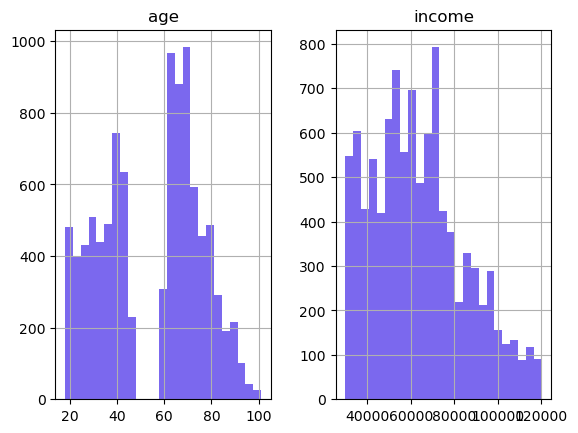

In [36]:
Customers_info[["age","income"]].hist(bins=25,color="mediumslateblue")

plt.savefig("Distribution of Age and Income")

**Age**
     - **The ages in the dataset range from approximately 20 to 100 years.**
     - **Concentration of individuals in their 50s and 60s,suggesting a higher representation of this age group**
     - **Marketing strategies or service offerings can be tailored to cater to this age group, which forms a substantial portion of the dataset.**
    
**Income**
    - **The income distribution appears to be skewed to the right, with more individuals earning between $60,000 and $80,000.**
    -  **There are fewer individuals in the higher income brackets (above $100,000), indicating that high-income earners are less represented in the dataset**
    - **Businesses or marketers can focus on this middle-income group for targeted promotions, products, or services.**


**The data suggests a focus on middle-aged adults (50s and 60s) with middle income ($60,000 - $80,000)**


In [37]:
#Summary Satistics
Customers_info.describe().round(2)

,age,income,Period,Joined_Date
count,9898.00,9898.00,9898.00,9898
mean,54.84,63535.87,520.78,2017-02-20 05:12:38.698726912
min,18.00,30000.00,0.00,2013-07-29 00:00:00
25%,36.00,47000.00,205.00,2016-05-20 06:00:00
50%,62.00,61000.00,354.00,2017-08-06 00:00:00
75%,71.00,76000.00,796.75,2018-01-02 00:00:00
max,101.00,120000.00,1823.00,2018-07-26 00:00:00
std,21.06,21211.55,423.20,NaN


### Transaction Dataset

   - **Event**
       - Extract the event Column
   - **Value**
       - Create values for event feature

In [38]:
Transaction_details.columns

Index(['person', 'event', 'value', 'time'], dtype='object')

In [39]:
Transaction_details.shape

(306534, 4)

In [40]:
Transaction_details.dtypes

person    object
event     object
value     object
time       int64
dtype: object

In [41]:
Transaction_details.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [42]:
Transaction_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [43]:
Transaction_details["event"].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [44]:
Transaction_details[Transaction_details["event"]=="transaction"]["value"].head()

12654    {'amount': 0.8300000000000001}
12657                 {'amount': 34.56}
12659                 {'amount': 13.23}
12670                 {'amount': 19.51}
12671                 {'amount': 18.97}
Name: value, dtype: object

In [45]:
Transaction_details[Transaction_details["event"]=="offer received"]["value"].head()

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
Name: value, dtype: object

In [46]:
Transaction_details[Transaction_details["event"]=="offer completed"]["value"].head()

12658    {'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12672    {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
12679    {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
12692    {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
12697    {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
Name: value, dtype: object

In [47]:
Transaction_details[Transaction_details["event"]=="offer viewed"]["value"].head()

12650    {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
12651    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
12652    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
12653    {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
12655    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
Name: value, dtype: object

In [48]:
Transaction_details.columns

Index(['person', 'event', 'value', 'time'], dtype='object')

In [49]:
#Transaction_details = pd.concat(
    #[Transaction_details.drop(columns=["value"]), Transaction_details["value"].apply(pd.Series)],
   # axis=1
#)

#pd.series--> the "value" column contains iterable elements, such as lists or dictionaries, and you want to expand these elements into separate columns.])

In [50]:
#new_columns = Transaction_details['value'].apply(lambda x: pd.Series(x))  
#It takes too much too time for execution

In [51]:
Transaction_details_expanded = pd.json_normalize(Transaction_details['value'])
Transaction_details = pd.concat([Transaction_details.drop(columns=['value']), Transaction_details_expanded], axis=1)

In [52]:
Transaction_details.columns

Index(['person', 'event', 'time', 'offer id', 'amount', 'offer_id', 'reward'], dtype='object')

In [53]:
#Fill Nan Values with 0 for amount and reward column
Transaction_details["amount"]=Transaction_details["amount"].fillna(0)
Transaction_details["reward"]=Transaction_details["reward"].fillna(0)

In [54]:
Transaction_details["offer id"]=Transaction_details["offer id"].fillna(Transaction_details["offer_id"])
Transaction_details=Transaction_details.drop(columns=["offer_id"],axis=1)

In [55]:
Transaction_details=Transaction_details.drop_duplicates()

In [56]:
#After creating a new columns
Transaction_details.head(15)
Transaction_details.shape

(306137, 6)

In [57]:
Transaction_details[Transaction_details["offer id"].isnull()]["event"].value_counts()

event
transaction    138953
Name: count, dtype: int64

## EXPLORING CLEANED DATA

In [58]:
Offers_details.head()

,reward,difficulty,duration,id,web,email,mobile,social,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,True,False,False
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,True,False,False
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,False,False,True
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,True,False,False
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,False,True,False


In [59]:
Customers_info.head()

,gender,age,id,income,Age group,Period,Joined_Date
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,61-80,443,2017-05-09
5,M,68.0,e2127556f4f64592b11af22de27a7932,70000.0,61-80,91,2018-04-26
8,M,65.0,389bc3fa690240e798340f5a15918d5c,53000.0,61-80,167,2018-02-09
13,F,61.0,aa4862eba776480b8bb9c68455b8c2e1,57000.0,61-80,318,2017-09-11
14,M,26.0,e12aeaf2d47d42479ea1c4ac3d8286c6,46000.0,20-45,1624,2014-02-13


In [60]:
Transaction_details.head()

,person,event,time,offer id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.0


## TRANSFORMING A DATA 
- Changing Id column as customer id and id of offer details as offer id
- Merge all 3 data 

In [61]:
Customers_info=Customers_info.rename(columns={'id':'person'})
Offers_details=Offers_details.rename(columns={'id':'offer id'})


In [62]:

Combined_data = pd.merge(Transaction_details, Offers_details, on='offer id', how='left')
Combined_data = pd.merge(Combined_data, Customers_info, on='person', how='left')
Combined_data.head()
Combined_data.sort_values(["person","time"])

,person,event,time,offer id,amount,reward_x,reward_y,difficulty,duration,web,...,social,offer_type_bogo,offer_type_discount,offer_type_informational,gender,age,income,Age group,Period,Joined_Date
55972,0009655768c64bdeb2e877511632db8f,offer received,168,5a8bc65990b245e5a138643cd4eb9837,0.00,0.0,0.0,0.0,3.0,0.0,...,1.0,False,False,True,M,33.0,72000.0,20-45,461.0,2017-04-21
77699,0009655768c64bdeb2e877511632db8f,offer viewed,192,5a8bc65990b245e5a138643cd4eb9837,0.00,0.0,0.0,0.0,3.0,0.0,...,1.0,False,False,True,M,33.0,72000.0,20-45,461.0,2017-04-21
89279,0009655768c64bdeb2e877511632db8f,transaction,228,NaN,22.16,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,M,33.0,72000.0,20-45,461.0,2017-04-21
113591,0009655768c64bdeb2e877511632db8f,offer received,336,3f207df678b143eea3cee63160fa8bed,0.00,0.0,0.0,0.0,4.0,1.0,...,0.0,False,False,True,M,33.0,72000.0,20-45,461.0,2017-04-21
139973,0009655768c64bdeb2e877511632db8f,offer viewed,372,3f207df678b143eea3cee63160fa8bed,0.00,0.0,0.0,0.0,4.0,1.0,...,0.0,False,False,True,M,33.0,72000.0,20-45,461.0,2017-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258113,ffff82501cea40309d5fdd7edcca4a07,transaction,576,NaN,14.23,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,F,45.0,62000.0,20-45,608.0,2016-11-25
258114,ffff82501cea40309d5fdd7edcca4a07,offer completed,576,2906b810c7d4411798c6938adc9daaa5,0.00,2.0,2.0,10.0,7.0,1.0,...,0.0,False,True,False,F,45.0,62000.0,20-45,608.0,2016-11-25
262204,ffff82501cea40309d5fdd7edcca4a07,offer viewed,582,2906b810c7d4411798c6938adc9daaa5,0.00,0.0,2.0,10.0,7.0,1.0,...,0.0,False,True,False,F,45.0,62000.0,20-45,608.0,2016-11-25
274495,ffff82501cea40309d5fdd7edcca4a07,transaction,606,NaN,10.12,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,F,45.0,62000.0,20-45,608.0,2016-11-25


In [63]:
Combined_data.columns

Index(['person', 'event', 'time', 'offer id', 'amount', 'reward_x', 'reward_y',
       'difficulty', 'duration', 'web', 'email', 'mobile', 'social',
       'offer_type_bogo', 'offer_type_discount', 'offer_type_informational',
       'gender', 'age', 'income', 'Age group', 'Period', 'Joined_Date'],
      dtype='object')

In [64]:
Combined_data.head()

,person,event,time,offer id,amount,reward_x,reward_y,difficulty,duration,web,...,social,offer_type_bogo,offer_type_discount,offer_type_informational,gender,age,income,Age group,Period,Joined_Date
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5.0,5.0,7.0,1.0,...,0.0,True,False,False,F,75.0,100000.0,61-80,443.0,2017-05-09
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0,5.0,20.0,10.0,1.0,...,0.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaT
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0,2.0,10.0,7.0,1.0,...,0.0,False,True,False,M,68.0,70000.0,61-80,91.0,2018-04-26
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.0,2.0,10.0,10.0,1.0,...,1.0,False,True,False,NaN,NaN,NaN,NaN,NaN,NaT
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.0,10.0,10.0,5.0,1.0,...,1.0,True,False,False,NaN,NaN,NaN,NaN,NaN,NaT


## DATA VISUALIZATION

#### 1.Age Distribution of Customers

In [65]:
print("App user age is between {} and {} years old".format(Customers_info['age'].min(), Customers_info['age'].max()))

App user age is between 18.0 and 101.0 years old


In [66]:
print("Average App user age is {} years old".format(round(Customers_info['age'].mean())))

Average App user age is 55 years old


#### 2.Disribution of channel types

AxesSubplot(0.125,0.11;0.168478x0.77)
AxesSubplot(0.327174,0.11;0.168478x0.77)
AxesSubplot(0.529348,0.11;0.168478x0.77)
AxesSubplot(0.731522,0.11;0.168478x0.77)


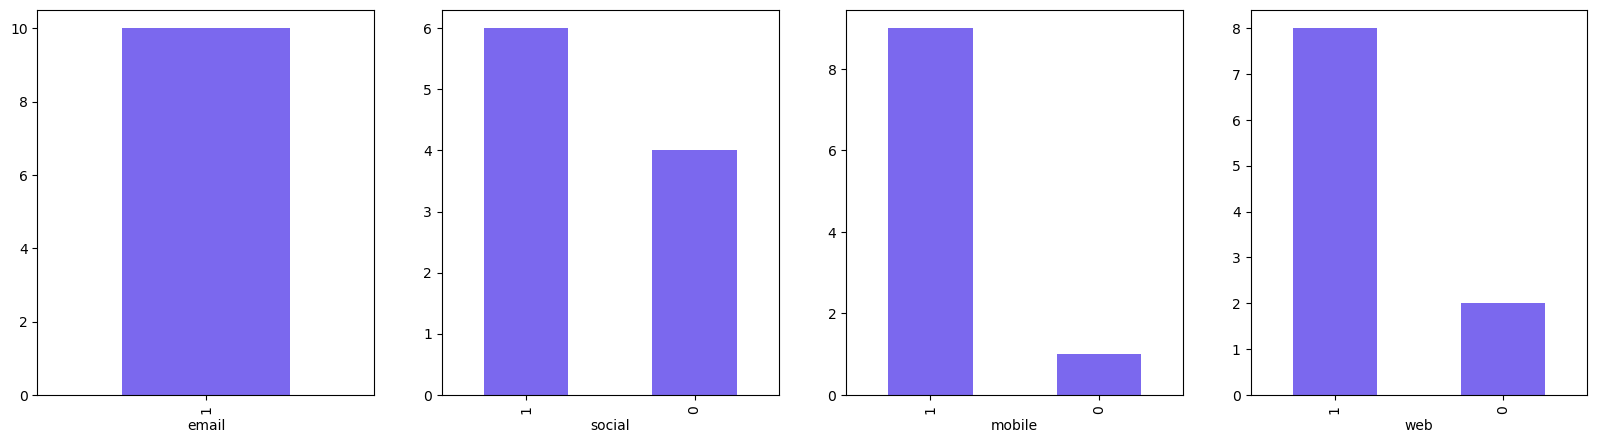

In [67]:
#email_num=Offers_details["Channel_email"].value_counts() 
fig,axes = plt.subplots (nrows=1, ncols=4, figsize=(20,5))
                        
print((Offers_details["email"].value_counts()).plot(kind ="bar",color="mediumslateblue", ax=axes[0]))
print((Offers_details["social"].value_counts()).plot(kind="bar",color="mediumslateblue",ax=axes[1])) 
print((Offers_details["mobile"].value_counts()).plot(kind="bar",color="mediumslateblue",ax=axes[2]))
print((Offers_details["web"].value_counts()).plot(kind="bar",color="mediumslateblue", ax=axes[3]))


- **High Usage**: Email and mobile promotions are used very frequently, indicating they are key strategies.
- **Balanced Use**: Social media and web promotions are used effectively but have room for more utilization.
- **Optimization Opportunity: Increase the use of social media promotions and explore new strategies for web promotions to enhance overall engagement.**

#### 3. Common information about

- *Number od events, Users and offers

- *Number of offers received/Viewed/Completed by an users

* *Total numbers of offers

In [68]:
print('Number of events: {}'.format(Transaction_details.shape[0]))
print('Number of users: {}'.format(Transaction_details['person'].nunique()))
print('Number of offers: {}'.format(Transaction_details['offer id'].nunique()))

Number of events: 306137
Number of users: 17000
Number of offers: 10


In [69]:
#User counts
print('\nNumber of users who received an offer       : {}' .format(Transaction_details[Transaction_details['event'] == 'offer received']['person'].nunique()))
print('Number of users who viewed an offer         : {}' .format(Transaction_details[Transaction_details['event'] == 'offer viewed']['person'].nunique()))
print('Number of users who completed an offer      : {}' .format(Transaction_details[Transaction_details['event'] == 'offer completed']['person'].nunique()))
print('Number of users who made transaction        : {}' .format(Transaction_details[Transaction_details['event'] == 'transaction']['person'].nunique()))


Number of users who received an offer       : 16994
Number of users who viewed an offer         : 16834
Number of users who completed an offer      : 12774
Number of users who made transaction        : 16578


##### If we want which users are made a transaction then

In [70]:
print('Number of users who received an offer       : \n{}' .format(Transaction_details[Transaction_details['event'] == 'offer received']['person'].head()))

Number of users who received an offer       : 
0    78afa995795e4d85b5d9ceeca43f5fef
1    a03223e636434f42ac4c3df47e8bac43
2    e2127556f4f64592b11af22de27a7932
3    8ec6ce2a7e7949b1bf142def7d0e0586
4    68617ca6246f4fbc85e91a2a49552598
Name: person, dtype: object


In [71]:
#Number of transaction, offer received, viewed are in data 
Transaction_details["event"].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33182
Name: count, dtype: int64

#### 4.Most used offer by the customers

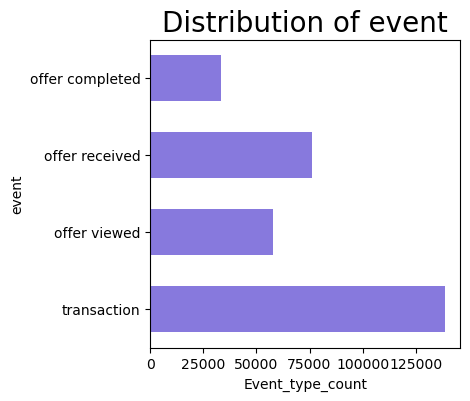

In [72]:
Transaction_details.columns
fig, ax =plt.subplots (figsize=(4, 4))
Event_df=Transaction_details.groupby(Transaction_details["event"],as_index=False).agg(Event_type_count=("person", "count"))
# Offer_received_df.head()
sns.barplot(data=Event_df,y="event", x="Event_type_count", color="mediumslateblue", width=0.6).set_title('Distribution of event', fontdict ={'fontsize': 20, 'horizontalalignment': 'center'})

plt.savefig('Transaction_details_event_type.png')

- **Transaction**-About 1,25,000.This event has the highest number. It means many people are making purchases . This is great, as it shows the promotions are working well to drive sales.
- **Offer received**-About 100,000.This is the second most frequent event. It means many people are receiving the promotional offers. To make this even better, we should make sure the right people are getting the right offers.
- **Offer Viewed**-About 50,000.This shows that about half of the received offers are being looked at. We can improve this by making our offers more attractive and easy to notice.
- **Offer completed**-About 25,000.This has the lowest count. It means fewer people are finishing the steps needed to complete the offers.

#### 5.Average number of Each offers types

In [73]:
print("Average number of received offfer:")
print(Combined_data[Combined_data['event']== 'offer received'].groupby('person').count()['offer id'].mean())
print('Average number of viewers:')
print(Combined_data[Combined_data['event']=='offer viewed'].groupby('person').count()['offer id'].mean())
print("Average number of completed offers")
print(Combined_data[Combined_data['event']=='offer completed'].groupby('person').count()['offer id'].mean())
print("Average number of transaction")
print(Combined_data[Combined_data['event']== 'transaction'].groupby('person').count()['offer id'].mean())

Average number of received offfer:
4.488466517594445
Average number of viewers:
3.4290721159558037
Average number of completed offers
2.5976201659621103
Average number of transaction
0.0


#### Calculate offer id's for each offer type


In [74]:
# Compute count of offert type
Offer_copy.groupby(Offer_copy["offer_type"],as_index=False).agg(Offers_count=("id","count")) 
#Offer_copy.groupby(['offer_type']) ['id'].count() --->This also give same value


,offer_type,Offers_count
0,bogo,4
1,discount,4
2,informational,2


- **BOGO**-This type of offer allows customers to get an additional item for free or at a discount when they purchase one item. It’s a popular promotion to encourage more sales by providing added value to the purchase.
- **Discount**-There are 4 discount offers. This type of offer provides customers with a percentage off or a fixed amount off the original price. Discounts are commonly used to attract price-sensitive customers and boost sales during promotional periods.
- **Information**-There are 2 informational offers. This type of offer is typically used to share information about products, services. Informational offers aim to educate customers and increase awareness.

In [75]:
bogo_id= Offer_copy [Offer_copy['offer_type'] == 'bogo']['id'].values.tolist() 
print("bogo id's are: {}\n".format(bogo_id))
discount_id = Offer_copy [Offer_copy['offer_type'] == 'discount']['id'].values.tolist()
print("discount id's are: {}\n".format(discount_id))
inform_id = Offer_copy[Offer_copy['offer_type'] == 'informational']['id'].values.tolist()
print("informational id's are: {}".format(inform_id))

bogo id's are: ['ae264e3637204a6fb9bb56bc8210ddfd', '4d5c57ea9a6940dd891ad53e9dbe8da0', '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'f19421c1d4aa40978ebb69ca19b0e20d']

discount id's are: ['0b1e1539f2cc45b7b9fa7c272da2e1d7', '2298d6c36e964ae4a3e7e9706d1fb8c2', 'fafdcd668e3743c1bb461111dcafc2a4', '2906b810c7d4411798c6938adc9daaa5']

informational id's are: ['3f207df678b143eea3cee63160fa8bed', '5a8bc65990b245e5a138643cd4eb9837']


#### 6.Total Sum of reward and Transaction

In [76]:
Transaction_details["reward"].sum()

162679.0

In [77]:
Transaction_details["amount"].sum()

1775451.9700000002

#### 7.Income distribution of Starbucks customers

<AxesSubplot:xlabel='income', ylabel='Count'>

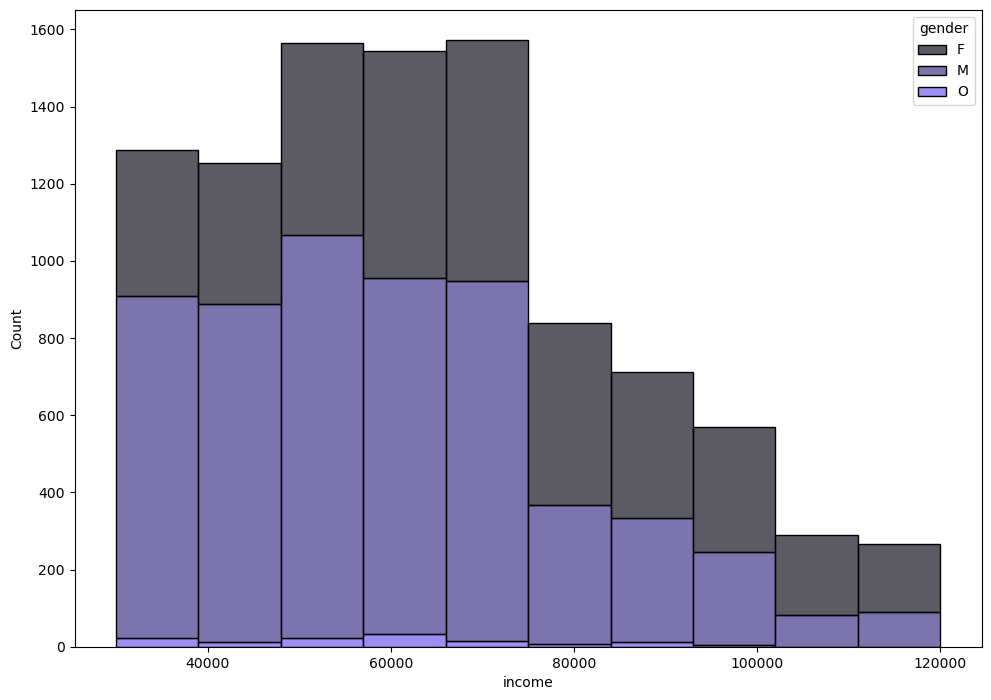

In [78]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.histplot(Customers_info, x="income", hue="gender", bins =10, multiple="stack",palette="dark:mediumslateblue")

**In the 20k-40k and 40k-60k income ranges, females and males are almost equally represented.
As the income increases, the proportion of males remains relatively high compared to females.
The representation of the 'Other' category is minimal across all income ranges.**
- Range of lower income (e.g., $20,000 - $40,000)-This segment appears to be the most populated and should not be overlooked.
- Range of middle income(e.g., $40,000 - $80,000): This segment has a large population that can be tapped into with effective marketing.
- Range of higher income (e.g., $80,000 - $120,000):Highlight premium products, exclusive offers, and personalized services to appeal to their higher spending power.

In [79]:
#Compare completion rates for different offers
offer_completion_rate=Combined_data.copy()

#Reshape data
offer_completion_rate = pd.pivot_table(offer_completion_rate, index='offer id', columns='event', values= 'person', aggfunc ='size').reset_index()
offer_completion_rate.columns =['offer_id', 'offer_completed', 'offer_received', 'offer viewed'] 
offer_completion_rate['offer_completed'] =offer_completion_rate['offer_completed'].fillna(0)

#Calculate completion rate-->the number of completed offers by the number of offers received 
offer_completion_rate['completion_rate'] = offer_completion_rate['offer_completed'] / offer_completion_rate['offer_received']
offer_completion_rate #--->Fills any missing values in the offer_completed column with 0. This is necessary because not all offers will have been completed.

#reset_index() converts the pivot table back to a DataFrame and resets the index.


,offer_id,offer_completed,offer_received,offer viewed,completion_rate
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,3340.0,7668.0,2663.0,0.435576
1,2298d6c36e964ae4a3e7e9706d1fb8c2,5112.0,7646.0,7337.0,0.668585
2,2906b810c7d4411798c6938adc9daaa5,3964.0,7632.0,4118.0,0.519392
3,3f207df678b143eea3cee63160fa8bed,0.0,7617.0,4144.0,0.000000
4,4d5c57ea9a6940dd891ad53e9dbe8da0,3301.0,7593.0,7298.0,0.434743
5,5a8bc65990b245e5a138643cd4eb9837,0.0,7618.0,6687.0,0.000000
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,4303.0,7677.0,4171.0,0.560505
7,ae264e3637204a6fb9bb56bc8210ddfd,3635.0,7658.0,6716.0,0.474667
8,f19421c1d4aa40978ebb69ca19b0e20d,4262.0,7571.0,7264.0,0.562938
9,fafdcd668e3743c1bb461111dcafc2a4,5265.0,7597.0,7327.0,0.693037


- The offer with offer_id fafdcd668e3743c1bb461111dcafc2a4 has the highest completion rate of approximately 69.3%.
Another high-performing offer is 2298d6c36e964ae4a3e7e9706d1fb8c2 with a completion rate of about 66.9%.**
- Offers with offer_ids 3f207df678b143eea3cee63160fa8bed and 5a8bc65990b245e5a138643cd4eb9837 have zero completion rates, indicating they were never completed despite being received.
- **This analysis can help in understanding the effectiveness of different offers and guide future promotional strategies by focusing on offers with higher completion rates and investigating why certain offers have low or zero completion rates.**

#### 8.Membership Period of user

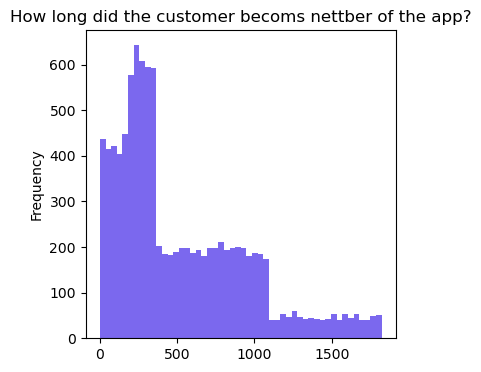

In [80]:
Number_of_days=Customers_info['Period'].plot(kind='hist', bins=50, title='How long did the customer becoms nettber of the app?',figsize=(4,4),color="mediumslateblue")
    
plt.savefig("Customer_membership.png")         

- **Focus on introductory offers to convert new members into active users.**
- **Medium-Term Members: Provide consistent engagement through loyalty programs and personalized offers.**
- **Implement strategies to retain and re-engage long-term members through special rewards and high-value offers.**

In [81]:
#Unique values of income feature
np.sort(Combined_data["income"].unique())

array([ 30000.,  31000.,  32000.,  33000.,  34000.,  35000.,  36000.,
        37000.,  38000.,  39000.,  40000.,  41000.,  42000.,  43000.,
        44000.,  45000.,  46000.,  47000.,  48000.,  49000.,  50000.,
        51000.,  52000.,  53000.,  54000.,  55000.,  56000.,  57000.,
        58000.,  59000.,  60000.,  61000.,  62000.,  63000.,  64000.,
        65000.,  66000.,  67000.,  68000.,  69000.,  70000.,  71000.,
        72000.,  73000.,  74000.,  75000.,  76000.,  77000.,  78000.,
        79000.,  80000.,  81000.,  82000.,  83000.,  84000.,  85000.,
        86000.,  87000.,  88000.,  89000.,  90000.,  91000.,  92000.,
        93000.,  94000.,  95000.,  96000.,  97000.,  98000.,  99000.,
       100000., 101000., 102000., 103000., 104000., 105000., 106000.,
       107000., 108000., 109000., 110000., 111000., 112000., 113000.,
       114000., 115000., 116000., 117000., 118000., 119000., 120000.,
           nan])

#### 9.Unique distribution

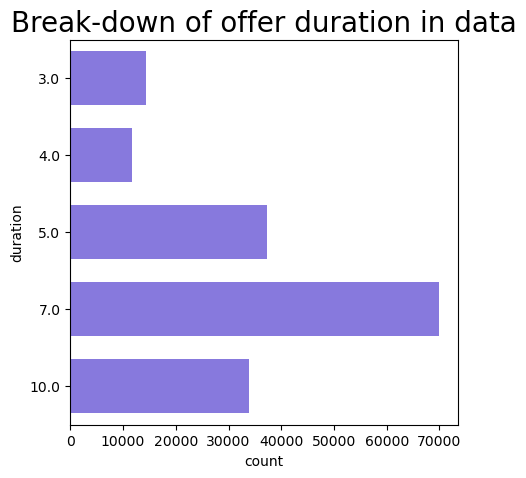

In [82]:
fig, ax = plt.subplots(figsize=(5, 5)) 
sns.countplot(data=Combined_data,y='duration',color="mediumslateblue",ax=ax,width=0.7).set_title("Break-down of offer duration in data", fontdict={'fontsize':20,'horizontalalignment':'center'})

plt.savefig('Offer_duration.png')



**The breakdown of offer durations shows that most offers last for 7 days, which seems to be very effective. However, it’s important to customize the length of offers based on your audience and keep trying different strategies to get the best results. This way, your offers will be more attractive and encourage customers to take action.**

#### 10.Average income of customers using this app

In [83]:
Combined_data["income"].mean()

62516.283676056875

#### 11.Actions to the offers that customers received

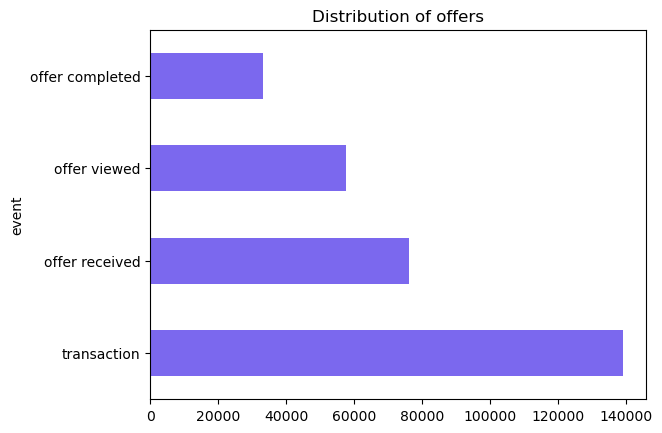

In [ ]:
Combined_data["event"].value_counts().plot.barh(title='Distribution of offers',color="mediumslateblue")

plt.savefig("Distribution of offers.png")

#### 12.Anlysing Gender Column

In [ ]:
Combined_data.gender.astype(str)

0           F
1         nan
2           M
3         nan
4         nan
         ... 
306132      M
306133    nan
306134      F
306135    nan
306136    nan
Name: gender, Length: 306137, dtype: object

,gender,No_of_User
0,F,74823
1,M,106532
2,O,2418


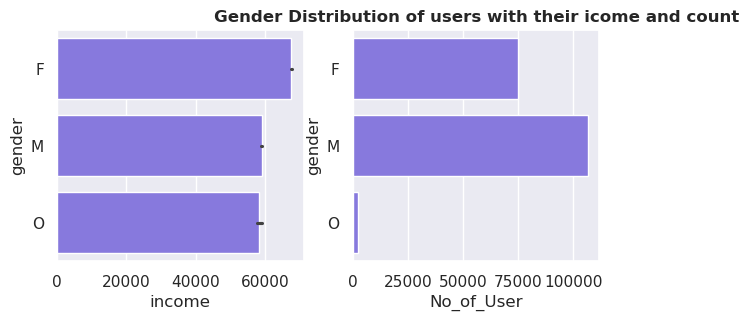

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
sns.barplot(data=Combined_data,y="gender",x="income",color="mediumslateblue",ax=axes[0])
plt.title("Gender Distribution of users with their icome and count",weight="bold")

plt.figure()

#Calculate count of unique gender
#plot distribution of gender count in dataframe
User_count=Combined_data.groupby(["gender"],as_index=False).agg(No_of_User=("person","count"))
sns.barplot(data=User_count,x="No_of_User",y="gender",color="mediumslateblue",ax=axes[1])
User_count



#### 13.Age Distribution of custmers

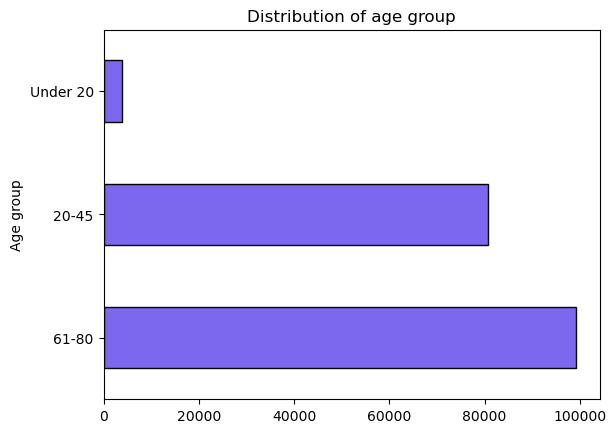

In [ ]:
Combined_data["Age group"].value_counts().plot.barh(title="Distribution of age group",color="mediumslateblue",edgecolor="black")

plt.savefig("Distribution_Age_Group.png")

#### 14.Distribution of males and females

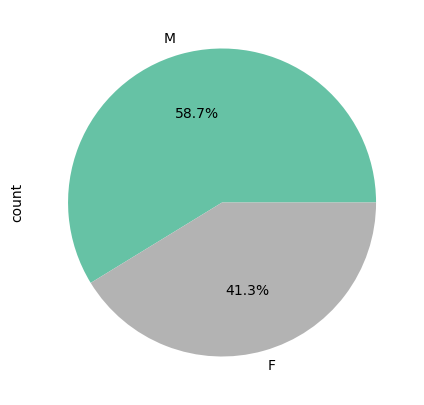

In [89]:
Gender_M_F=Combined_data[Combined_data["gender"]!="O"]
Gender_M_F.gender.value_counts().plot(kind="pie",figsize=(5,5),autopct="%1.1f%%",cmap="Set2")
#autopct="%1.1f%%
plt.savefig("Gender_Calculation.png")

#### 15.Age Group of males & females

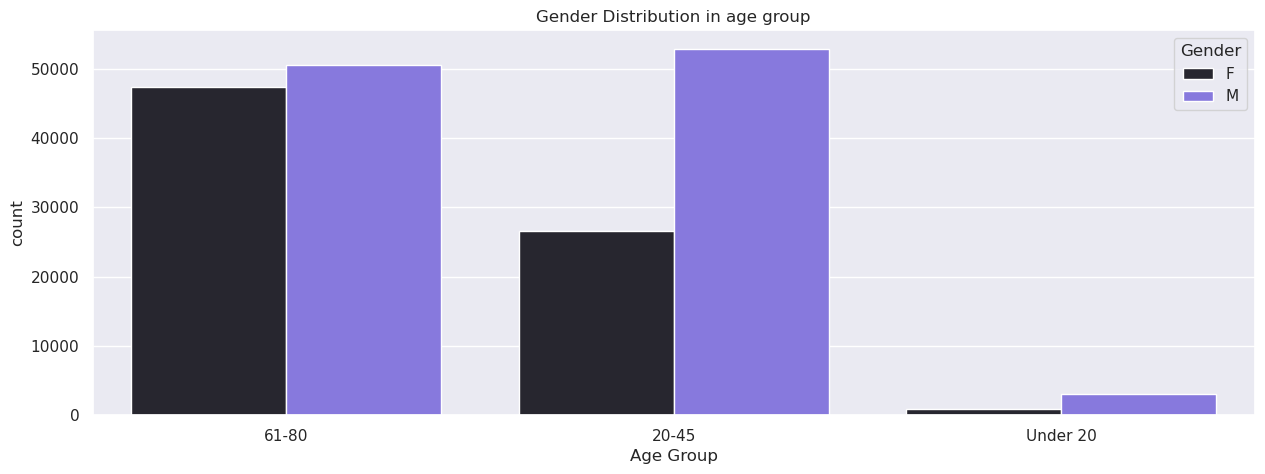

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Age group",hue="gender",data=Gender_M_F,palette="dark:mediumslateblue")
sns.set(style="darkgrid")
plt.title("Gender Distribution in age group")
plt.ylabel("count")
plt.xlabel("Age Group")
plt.legend(title="Gender")

plt.savefig("Gender_dist_age_group.png")

#### 16.Actions to the offers that males and females received

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

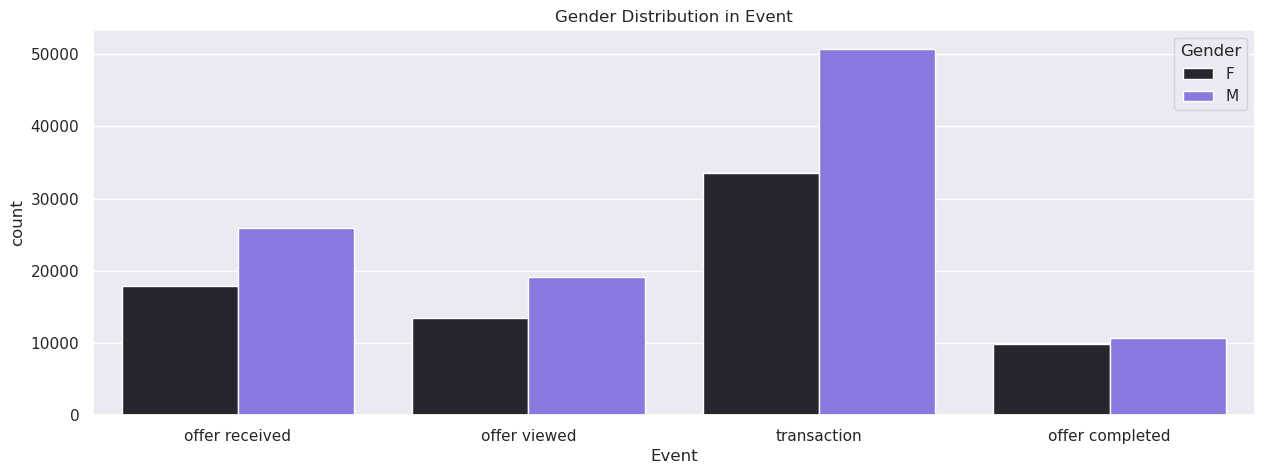

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="event",hue="gender",data=Gender_M_F,palette="dark:mediumslateblue")
plt.title("Gender Distribution in Event")
plt.ylabel("count")
plt.xlabel("Event")
plt.legend(title="Gender")

plt.savefig("Gender_dist_event.png")
plt

#### 17.People joined as member on each year

<AxesSubplot:xlabel='year_joined', ylabel='Count'>

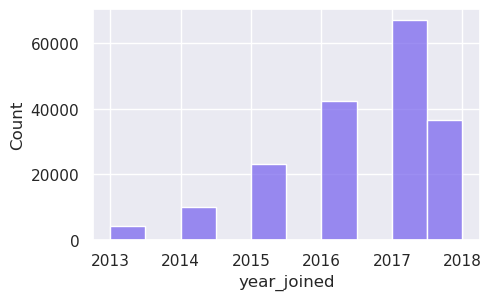

In [ ]:
Combined_data["year_joined"]=pd.DatetimeIndex(Combined_data["Joined_Date"]).year
fig,ax=plt.subplots(figsize=(5,3))
sns.histplot(Combined_data,x="year_joined",bins=10,multiple="stack",color="mediumslateblue")

- Growth Over Time: There is a clear trend of increasing membership over the years, with the peak in 2017.
- Peak in 2017: The highest number of joiners occurred in 2017, indicating a significant spike in membership.
- Decrease in 2018: While the count decreased in 2018 compared to 2017, it still remained relatively high compared to earlier years.
- **There was a strong upward trend in the number of individuals joining each year from 2013 to 2017, followed by a slight decline in 2018. The peak in 2017 could indicate a particularly successful year in terms of attracting new members.**

#### 18.Total rewards and amount spent by cutomers

(0.0, 20.0)

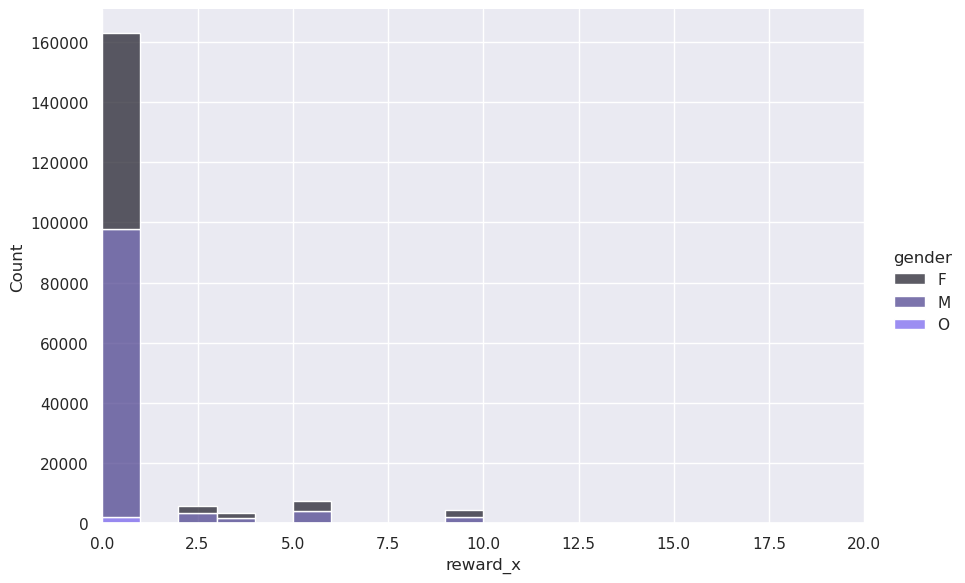

In [ ]:
sns.displot(x="reward_x",hue="gender",data=Combined_data,height=6,aspect=1.5,multiple="stack",bins=10,palette="dark:mediumslateblue")
plt.xlim(0,20)

- **The data shows a high concentration of individuals with a reward value of 0.0 across all genders.**
- **For higher reward values (2.5 and above), the counts are very low, indicating that very few individuals receive higher rewards.**
- **Gender Comparison: For non-zero reward values, the counts for males and females are comparable, while the 'Other' category consistently shows minimal counts across all reward values.**
- **The majority of individuals do not receive significant rewards (indicated by the large number of 0.0 reward values), and among those who do receive rewards, the numbers are quite small and distributed similarly across genders, with the 'Other' category being the least represented.**

#### 19.Count of each gender based on year

In [ ]:
Combined_data.columns

Index(['person', 'event', 'time', 'offer id', 'amount', 'reward_x', 'reward_y',
       'difficulty', 'duration', 'web', 'email', 'mobile', 'social',
       'offer_type_bogo', 'offer_type_discount', 'offer_type_informational',
       'gender', 'age', 'income', 'Age group', 'Period', 'Joined_Date'],
      dtype='object')

In [ ]:
#Create gender_by_year_df to used to create visualization
gender_by_year_df=pd.DataFrame(Combined_data.groupby(["year_joined"])["gender"].value_counts())
gender_by_year_df.rename(columns={'gender':'count'},inplace=True)
gender_by_year_df

count
year_joined gender       
2013.0      M        3269
            F        1089
            O          39
2014.0      M        7837
            F        2315
            O          25
2015.0      M       13576
            F        9253
            O         402
2016.0      M       22174
            F       19725
            O         449
2017.0      M       36343
            F       29871
            O         889
2018.0      M       23333
            F       12570
            O         614

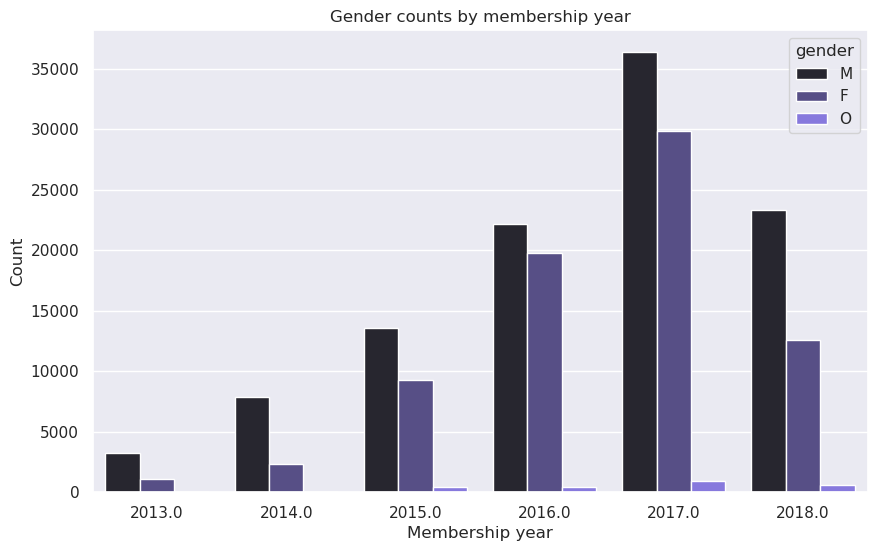

In [ ]:
#Plot gender counts per membership year/Joined year
fig, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=1)

sns.barplot(x='year_joined', y='count', hue='gender', data=gender_by_year_df,palette='dark:mediumslateblue') 
plt.xlabel('Membership year')
plt.ylabel('Count')
plt.title('Gender counts by membership year')
plt.show()

The bar chart shows the counts of members by gender (M for male, F for female, and O for other) and by their membership year from 2013 to 2018.
- **Overall Growth: There is a noticeable increase in membership for both males and females from 2013 to 2017, with a slight decline in 2018.**
- **2017 Peak: Both male and female memberships peaked in 2017, with males having the highest count overall.**

#### 20.Percentage of Unique Values in Event

In [ ]:
# Calculate the percentage of unique values in event
Event_percen=(Combined_data['event'].value_counts()/Combined_data['event'].value_counts().sum())*100
round (Event_percen, 2)

event
transaction        45.39
offer received     24.92
offer viewed       18.86
offer completed    10.84
Name: count, dtype: float64